In [ ]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
tf.random.set_seed(42)

## 패션 MNIST 데이터 불러오기

In [37]:
## Load Data
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [38]:
train_input = train_input[:1000]
train_target = train_target[:1000]
test_input = test_input[:100]
test_target = test_target[:100]

In [39]:
## Data Scaling (픽셀 값이 최대 255이기 때문에 255기준으로 0~1 MinMaxScaling 진행)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
## Train/Test Split (8:2)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

## 시각화

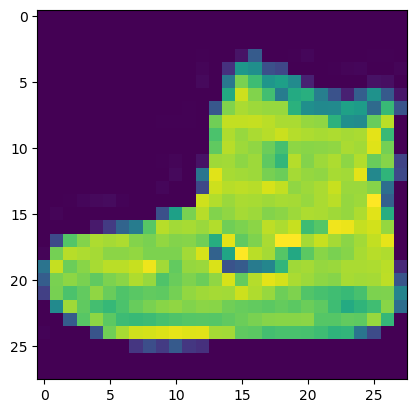

In [40]:
img = train_input[0]
import matplotlib.pyplot as plt 
plt.imshow(img)
plt.show()

In [41]:
train_scaled.shape

(800, 28, 28, 1)

In [46]:
test_scaled.shape

(100, 28, 28, 1)

In [48]:
tree_train = np.reshape(train_scaled,(800,-1))
tree_test = np.reshape(test_scaled,(100,-1))
tree_train.shape

(800, 784)

In [61]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0, max_depth=10)
tree_model.fit(tree_train, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [62]:
train_pred = tree_model.predict(tree_train)
f1_score(train_target, train_pred, average = 'macro')

0.982165022319354

In [63]:
test_pred = tree_model.predict(tree_test)
f1_score(test_target, test_pred, average = 'macro')

0.6441109995234633

In [64]:
confusion_matrix(test_target, tree_pred)

array([[ 5,  1,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 1, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  6,  0,  4,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  6,  1,  0,  0,  0,  2,  0],
       [ 0,  0,  8,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  2,  0,  1],
       [ 0,  0,  2,  0,  1,  0,  4,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  4]])

## Model - Conv2D

In [19]:
train_scaled.shape

(8000, 28, 28, 1)

In [20]:
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, Input, Conv2DTranspose, Concatenate, Resizing, BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import EarlyStopping

from keras.preprocessing.image import ImageDataGenerator

In [21]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = train_scaled.shape[1:]))
model.add(Conv2D(64, 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(len(np.unique(train_target)), activation = 'softmax'))
# model.summary()

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10,restore_best_weights=True, mode='min')
history = model.fit(train_scaled, train_target, epochs=1, batch_size = 128 , validation_data=(val_scaled, val_target), callbacks = early_stopping_callback)

63/63 [==============================] - 13s 200ms/step - loss: 0.9199 - accuracy: 0.6714 - val_loss: 0.5065 - val_accuracy: 0.8250


In [24]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['train', 'val'])
# plt.show()

4/4 [==============================] - 0s 11ms/step


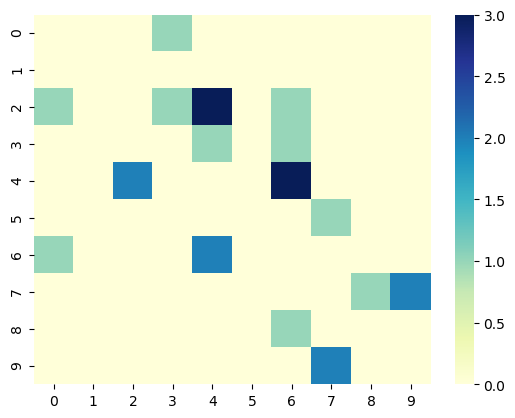

In [32]:
mode = 'test'

pred = model.predict(globals()[f'{mode}_scaled'])
pred = np.argmax(pred, axis = 1)

import seaborn as sns
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
confusion_max = confusion_matrix(globals()[f'{mode}_target'], pred)
np.fill_diagonal(confusion_max, 0)

sns.heatmap(confusion_max, cmap="YlGnBu")
plt.show()